## Задача 1.  Матричные вычисления, оценка скорости и погрешностей (5 баллов).

1. Напишите функцию, которая вычисляет экспоненту от матрицы размера $2 \times 2$, используя определение экспоненты через предел

$$
\lim _{s \rightarrow \infty}(I+A / s)^s ;  s = 2^N
$$

Элементами матрицы могут быть любые комплексные числа. Возведение матрицы в квадрат напишите самостоятельно, написав его поэлементно, использовав 5 умножений вместо 8 для стандартного способа умножения двух матриц.

Возьмите любую матрицу на ваш выбор и продемонстрируйте, как падает ошибка по спектральной норме при росте N, построив график зависимости ошибки от N. Дальнейшую часть задания делайте при каком-то достаточно большом N, при котором относительная ошибка очень мала.


2. Возьмите какую-то одну матрицу, экспоненту для которой вы знаете точно, с большим числом обусловленности, сгенерируйте 1000 случайных матриц для малых возмущений, элементы которых вещественные числа, распределенные равномерно в диапазоне от -0.01 до 0.01 (если элементы вашей матрицы довольно малы, то можете взять в значительно меньшем диапазоне). Постройте график спектральной нормы разницы точного значения экспоненты из этой матрицы и вычисляемой экспоненты из суммы матрицы и её возмущения, в зависимости от нормы возмущения.

3. Затем возьмите матрицу с маленьким числом обусловленности, экспоненту для которой вы знаете точно, и проделайте то же самое, что в пункте 2.

4. Постройте график зависимости времени работы программы в зависимости от количества вычисляемых экспонент для обоих предыдущих пунктов.

5. Вычислите функцию $f(t) = || e^{t A} ||$ (норма Фробениуса), используя формулы

$$
e^{t A}=\mathrm{Te}^{\mathrm{tJ}} \mathrm{~T}^{-1}
$$

$$
exp(\left[\begin{array}{cc}
\lambda t & t \\
0 & \lambda t
\end{array}\right]) = \left[\begin{array}{cc}
e^{\lambda t} & \frac{t e^{\lambda t}}{1!} \\
0 & e^{\lambda t}
\end{array}\right]
$$

$$
exp(\left[\begin{array}{cc}
a t & 0 \\
0 & b t
\end{array}\right]) = \left[\begin{array}{cc}
e^{a t} & 0 \\
0 & e^{b t}
\end{array}\right]
$$

Матрицу возьмите произвольную. Постройте график от t.


In [1]:
import sympy as smp

In [2]:
import numpy as np

In [3]:
def exponent(matrix, N):
    s = smp.symbols('s')
    E = np.eye(2)
    expr = np.zeros((2,2))
    for i in range (0, 2):
        for j in range (0, 2):
            expr[i][j] = float(np.array((smp.Limit(np.array(smp.Matrix((E+matrix/s)**s))[i][j]+1e-10, s, 2**N).doit())).astype(np.float64))
    return expr

In [4]:
A = np.array([[2, 0],[0, 3]])
exponent(A, 10)

array([[7.37465716e+00, 1.00000000e-10],
       [1.00000000e-10, 1.99976353e+01]])

Возьмем трушную матричную экспоненту 

In [8]:
A_true = np.array([[np.exp(2), 0], [0, np.exp(3)]])
difference = []
N_array = np.linspace(0, 10, 10)
for i in range (0, 10):
    calculated = exponent(A, i)
    difference.append(np.linalg.norm(calculated-A_true, 2))

In [9]:
import matplotlib.pyplot as plt

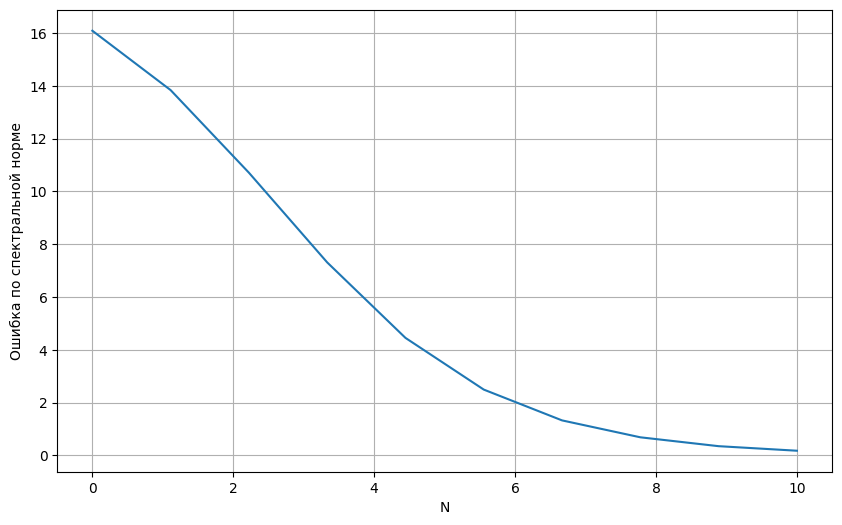

In [11]:
plt.figure(figsize=(10,6))
plt.xlabel("N")
plt.ylabel("Ошибка по спектральной норме")
plt.grid(True)
plt.plot(N_array, difference)

In [12]:
B = np.array([[100, 0],[0, 0.01]])
B_true_exp = np.array([[np.exp(100),0],[0, np.exp(0.01)]])

In [15]:
fluctuation = []
fluctuation_norm = []
difference = []
for i in range (0, 50):
    osc = np.random.uniform(-0.01, 0.01, (2, 2))
    fluctuation.append(osc)
    fluctuation_norm.append(np.linalg.norm(osc, 2))

for fluc in fluctuation:
    difference.append(np.linalg.norm(exponent(B+fluc, 10) - B_true_exp, 2))

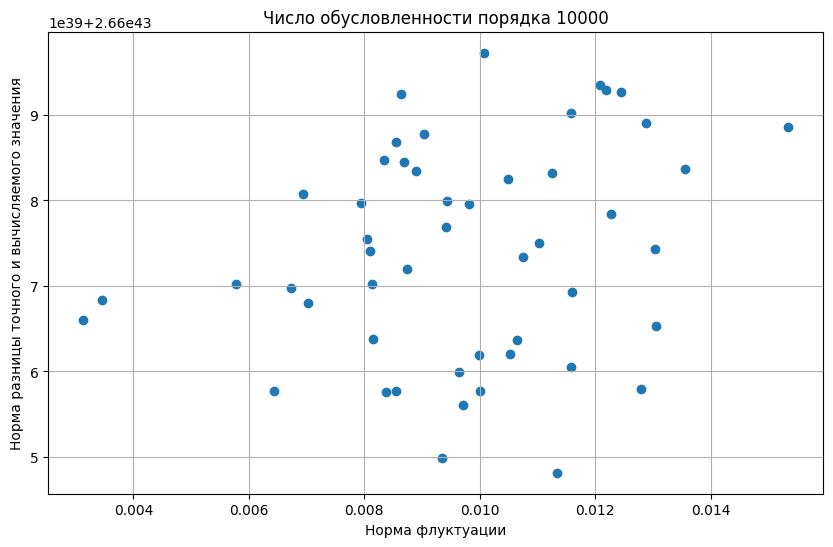

In [16]:
plt.figure(figsize=(10,6))
plt.xlabel('Норма флуктуации')
plt.ylabel('Норма разницы точного и вычисляемого значения')
plt.title('Число обусловленности порядка 10000')
plt.grid(True)
plt.scatter(fluctuation_norm, difference)

In [17]:
C = np.array([[1, 0],[0, 2]])
C_true_exp = np.array([[np.exp(1),0],[0, np.exp(2)]])

In [18]:
fluctuation = []
fluctuation_norm = []
difference = []
for i in range (0, 50):
    osc = np.random.uniform(-0.01, 0.01, (2, 2))
    fluctuation.append(osc)
    fluctuation_norm.append(np.linalg.norm(osc, 2))

for fluc in fluctuation:
    difference.append(np.linalg.norm(exponent(C+fluc, 10) - C_true_exp, 2))

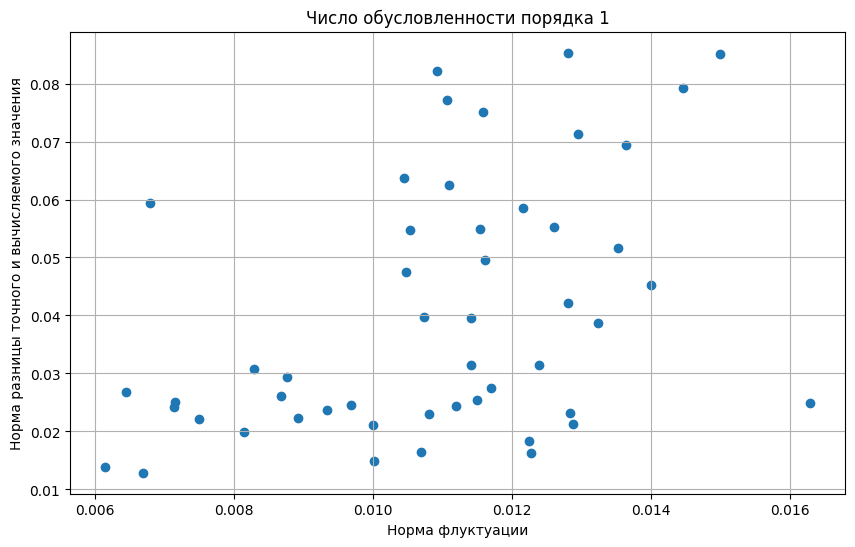

In [19]:
plt.figure(figsize=(10,6))
plt.xlabel('Норма флуктуации')
plt.ylabel('Норма разницы точного и вычисляемого значения')
plt.title('Число обусловленности порядка 1')
plt.grid(True)
plt.scatter(fluctuation_norm, difference)

## Задача 2. Регуляризация и регрессия, метод наименьших квадратов и SVD (4 балла).

Мы хотим приблизить функцию $f(x,y)$ на квадрате $0 <= x <= 1; 0 <= y <= 1$ и проверить, насколько точно аппроксимация совпадает с этой функций на таблице значений с шагом $0.05$ (проще говоря, с таблицей чисел 21 на 21).

$$
f(x,y) = sin(x) \cdot cos(y) \cdot \ln(x+y+1)
$$

Проще говоря, мы ищем наилучшую аппроксимации среди моделей вида

$$
\check{y}(x, y)=g_{\mathbf{w}}(x, y)=\sum_{k=1}^m \mathbf{w}_k \cdot f_k(x, y)
$$

где $\left\{f_k(x, y)\right\}_{k=1}^m = \left\{sin(k_1 \cdot x) \cdot cos(k_2 \cdot y)\right\}_{k=1}^m$ -  набор из $m$ функций.

Здесь $m = 11^2, k_1 = 1 + (m-1) \ div \ 11, k_2 = (m-1) \ mod \ 11$ (остаток и целая часть от деления).

1. Постройте матрицу $X$ объект-признак размера $21^2 \times 11^2$ для этой задачи и визуализируйте ее.
2. Вычислите матрицу $X^T X$ и её число обусловленности. Оцените ошибку вычисления весов, исходя из машинной погрешности.
3. Найдите веса модели, использовав метод наименьших квадратов.
4. Постройте таблицу значений 21 на 21 с помощью модели и вычислите ошибку аппроксимации по спектральной норме.


## Задача 3. Решение нелинейных уравнений и поиск минимума функций. (3 балла).

Свести задачу решения системы нелинейных уравнений $\left\{\begin{array}{l}x^2-y^2=1, \\ x y^3-y=4\end{array}\right.$ к задаче поиска минимума.

1. Найдите минимум полученного функционала методом наискорейшего спуска.

2. Найдите минимум полученного функционала методом сопряженных градиентов.

3. Сравните эффективность этих методов - постройте графики зависимости точности от количества итераций.
